# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download the Coffe sales Dataset](https://www.kaggle.com/datasets/sidraaazam/coffee-sales-insights-report/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import CSV file

In [2]:
df = pd.read_csv('Coffe_sales.csv')

# Preprocessing

## Details of Dataset

### Frist five row

In [3]:
df.head()

hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
0           10      card   38.7          Latte     Morning     Fri        Mar   
1           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
2           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
3           13      card   28.9      Americano   Afternoon     Fri        Mar   
4           13      card   38.7          Latte   Afternoon     Fri        Mar   

   Weekdaysort  Monthsort        Date             Time  
0            5          3  2024-03-01  10:15:50.520000  
1            5          3  2024-03-01  12:19:22.539000  
2            5          3  2024-03-01  12:20:18.089000  
3            5          3  2024-03-01  13:46:33.006000  
4            5          3  2024-03-01  13:48:14.626000

### last Five row

In [4]:
df.tail()

hour_of_day cash_type  money coffee_name Time_of_Day Weekday Month_name  \
3542           10      card  35.76  Cappuccino     Morning     Sun        Mar   
3543           14      card  35.76       Cocoa   Afternoon     Sun        Mar   
3544           14      card  35.76       Cocoa   Afternoon     Sun        Mar   
3545           15      card  25.96   Americano   Afternoon     Sun        Mar   
3546           18      card  35.76       Latte       Night     Sun        Mar   

      Weekdaysort  Monthsort        Date             Time  
3542            7          3  2025-03-23  10:34:54.894000  
3543            7          3  2025-03-23  14:43:37.362000  
3544            7          3  2025-03-23  14:44:16.864000  
3545            7          3  2025-03-23  15:47:28.723000  
3546            7          3  2025-03-23  18:11:38.635000

### Shape of our dataset

In [5]:
df.shape

(3547, 11)

### List out all columns

In [6]:
df.columns

Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day',
       'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time'],
      dtype='object')

### Datatype of each columns

In [7]:
df.dtypes

hour_of_day      int64
cash_type       object
money          float64
coffee_name     object
Time_of_Day     object
Weekday         object
Month_name      object
Weekdaysort      int64
Monthsort        int64
Date            object
Time            object
dtype: object

### Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


### Check Null Value

In [9]:
df.isnull().sum()

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

### Convert Columns to Correct Data Types

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [12]:
# Now we don't need Date column so....
df.drop(columns=['Date'], inplace=True)

In [13]:
df.head()

hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
0           10      card   38.7          Latte     Morning     Fri        Mar   
1           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
2           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
3           13      card   28.9      Americano   Afternoon     Fri        Mar   
4           13      card   38.7          Latte   Afternoon     Fri        Mar   

   Weekdaysort  Monthsort             Time  day  month  year  
0            5          3  10:15:50.520000    1      3  2024  
1            5          3  12:19:22.539000    1      3  2024  
2            5          3  12:20:18.089000    1      3  2024  
3            5          3  13:46:33.006000    1      3  2024  
4            5          3  13:48:14.626000    1      3  2024

# EDA

In [14]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

## Univariate

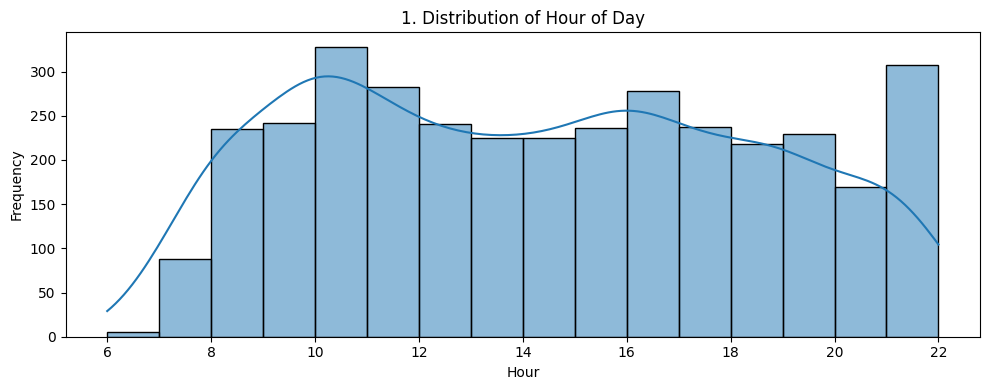

In [15]:
plt.figure(figsize=(10,4))
sns.histplot(df['hour_of_day'], kde=True)
plt.title(f"{plot_no}. Distribution of Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Frequency")
show_fig()
plot_no += 1

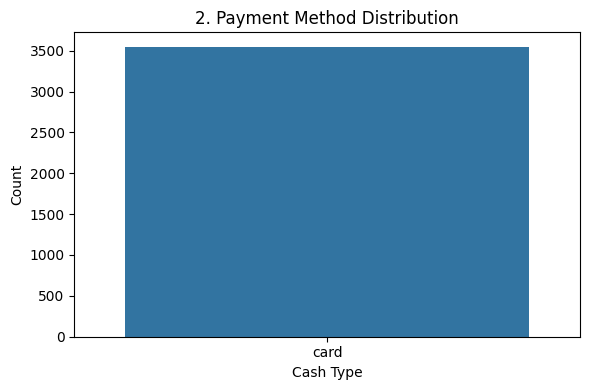

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['cash_type'])
plt.title(f"{plot_no}. Payment Method Distribution")
plt.xlabel("Cash Type")
plt.ylabel("Count")
show_fig()
plot_no += 1

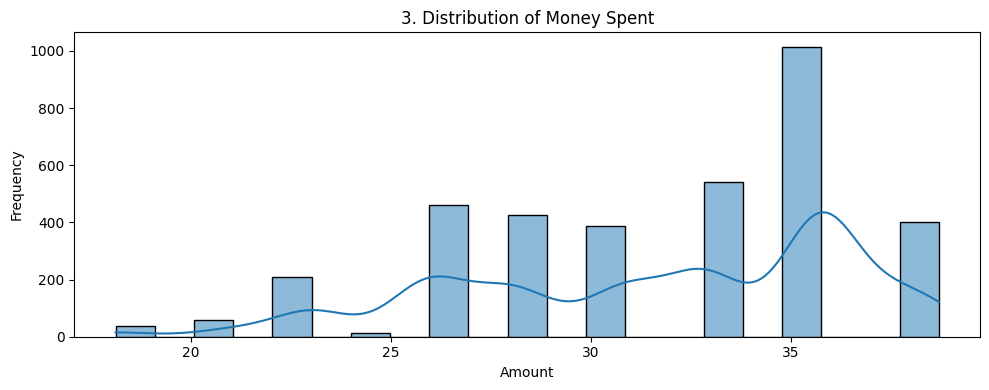

In [17]:
plt.figure(figsize=(10,4))
sns.histplot(df['money'], kde=True)
plt.title(f"{plot_no}. Distribution of Money Spent")
plt.xlabel("Amount")
plt.ylabel("Frequency")
show_fig()
plot_no += 1

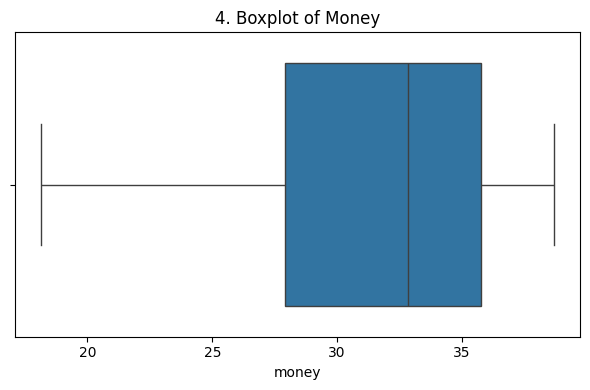

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['money'])
plt.title(f"{plot_no}. Boxplot of Money")
show_fig()
plot_no += 1

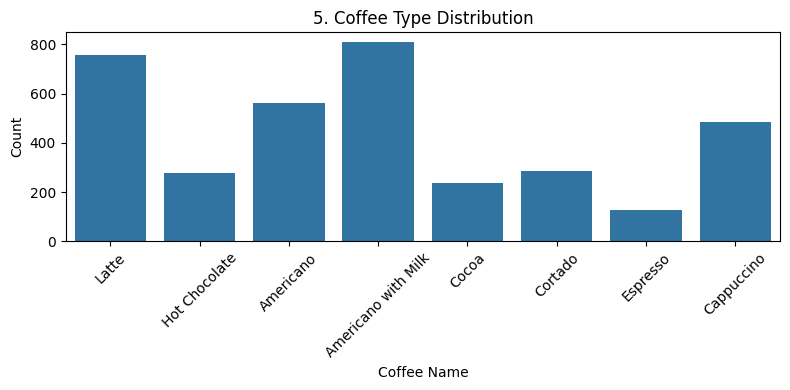

In [19]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['coffee_name'])
plt.title(f"{plot_no}. Coffee Type Distribution")
plt.xlabel("Coffee Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
show_fig()
plot_no += 1

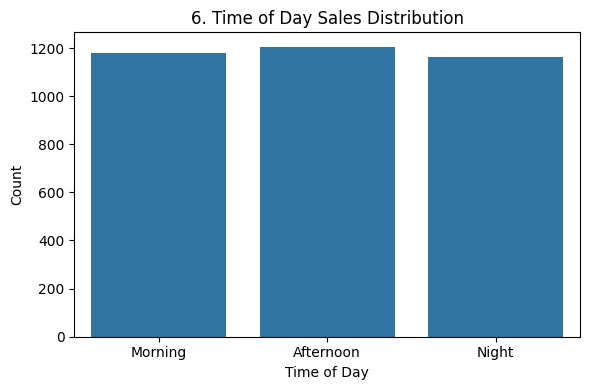

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Time_of_Day'])
plt.title(f"{plot_no}. Time of Day Sales Distribution")
plt.xlabel("Time of Day")
plt.ylabel("Count")
show_fig()
plot_no += 1

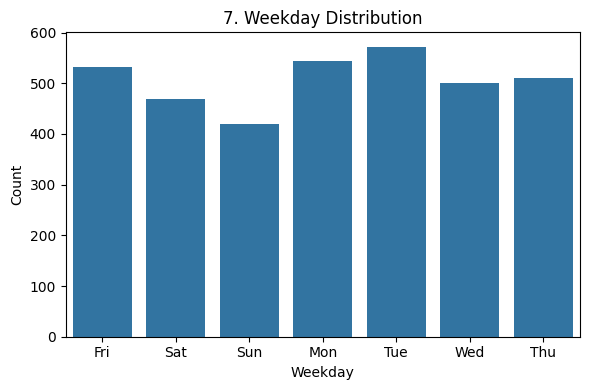

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Weekday'])
plt.title(f"{plot_no}. Weekday Distribution")
plt.xlabel("Weekday")
plt.ylabel("Count")
show_fig()
plot_no += 1

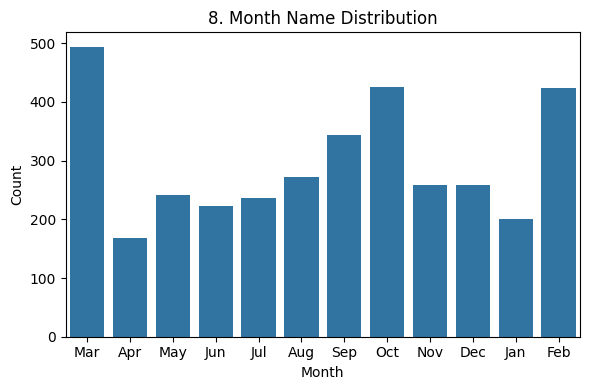

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Month_name'])
plt.title(f"{plot_no}. Month Name Distribution")
plt.xlabel("Month")
plt.ylabel("Count")
show_fig()
plot_no += 1

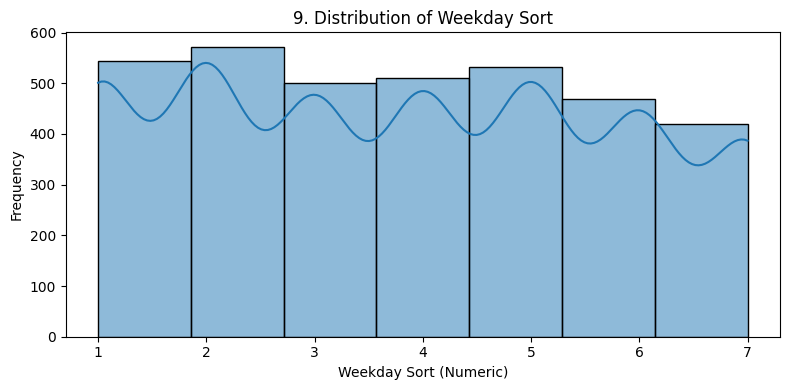

In [23]:
plt.figure(figsize=(8,4))
sns.histplot(df['Weekdaysort'], kde=True, bins=7)
plt.title(f"{plot_no}. Distribution of Weekday Sort")
plt.xlabel("Weekday Sort (Numeric)")
plt.ylabel("Frequency")
show_fig()
plot_no += 1

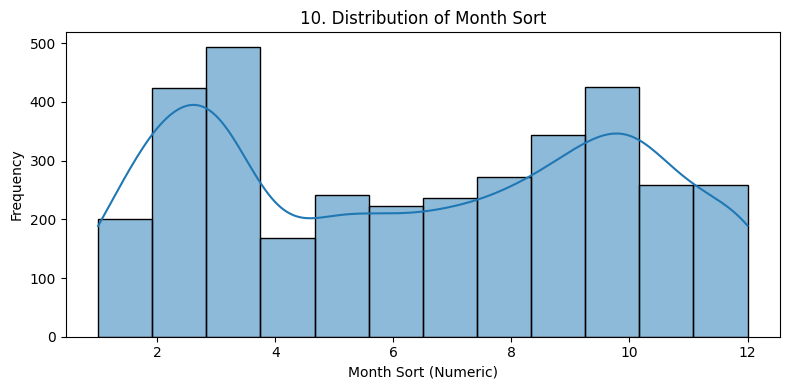

In [24]:
plt.figure(figsize=(8,4))
sns.histplot(df['Monthsort'], kde=True, bins=12)
plt.title(f"{plot_no}. Distribution of Month Sort")
plt.xlabel("Month Sort (Numeric)")
plt.ylabel("Frequency")
show_fig()
plot_no += 1

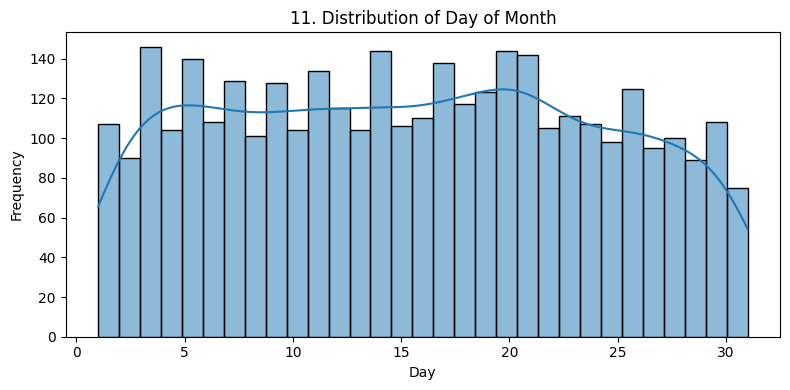

In [25]:
plt.figure(figsize=(8,4))
sns.histplot(df['day'], kde=True, bins=31)
plt.title(f"{plot_no}. Distribution of Day of Month")
plt.xlabel("Day")
plt.ylabel("Frequency")
show_fig()
plot_no += 1

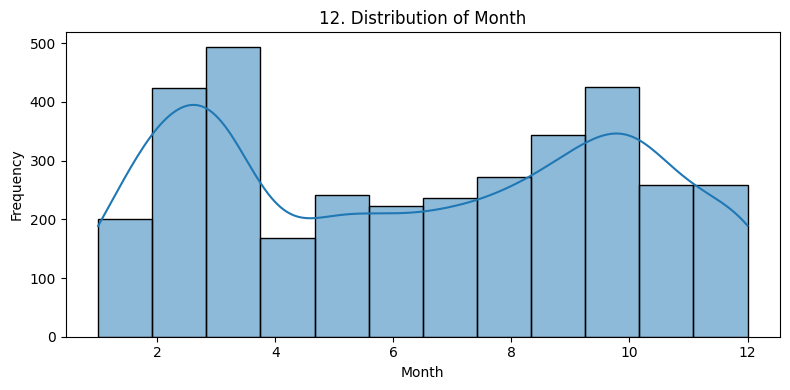

In [26]:
plt.figure(figsize=(8,4))
sns.histplot(df['month'], kde=True, bins=12)
plt.title(f"{plot_no}. Distribution of Month")
plt.xlabel("Month")
plt.ylabel("Frequency")
show_fig()
plot_no += 1

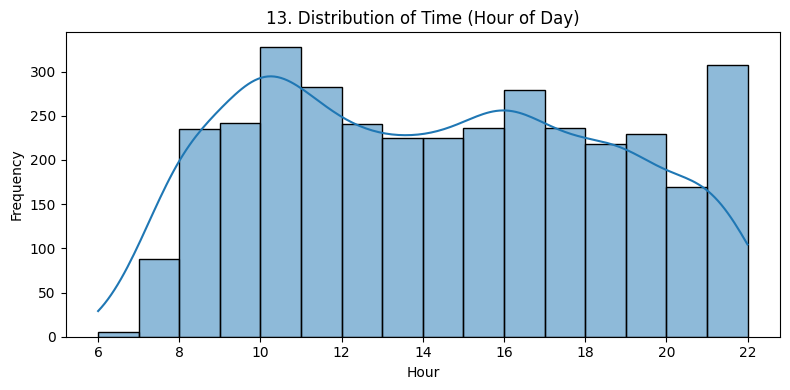

In [27]:
df['time_hour'] = pd.to_datetime(df['Time']).dt.hour

plt.figure(figsize=(8,4))
sns.histplot(df['time_hour'], kde=True)
plt.title(f"{plot_no}. Distribution of Time (Hour of Day)")
plt.xlabel("Hour")
plt.ylabel("Frequency")
show_fig()
plot_no += 1

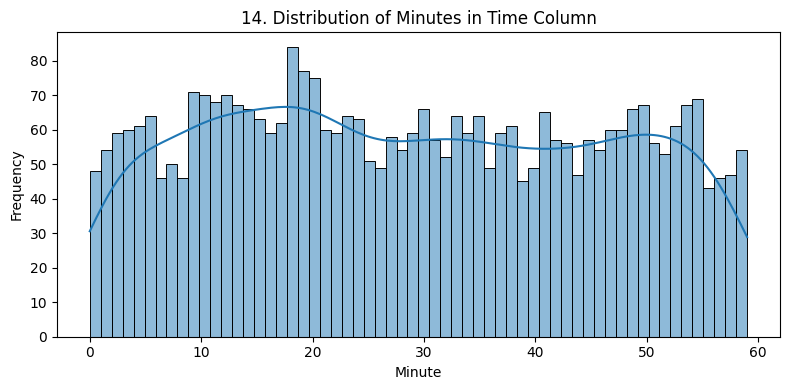

In [28]:
df['time_minute'] = pd.to_datetime(df['Time']).dt.minute

plt.figure(figsize=(8,4))
sns.histplot(df['time_minute'], kde=True, bins=60)
plt.title(f"{plot_no}. Distribution of Minutes in Time Column")
plt.xlabel("Minute")
plt.ylabel("Frequency")
show_fig()
plot_no += 1

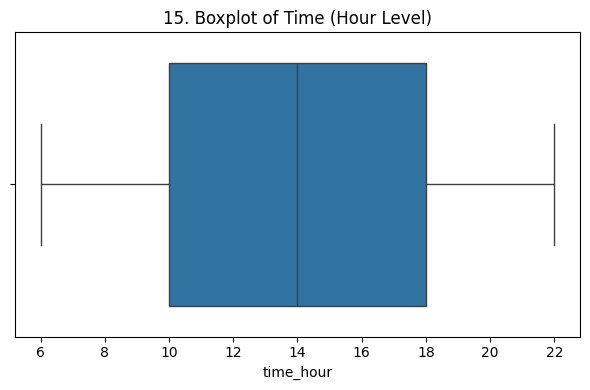

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['time_hour'])
plt.title(f"{plot_no}. Boxplot of Time (Hour Level)")
show_fig()
plot_no += 1

## Bivariate

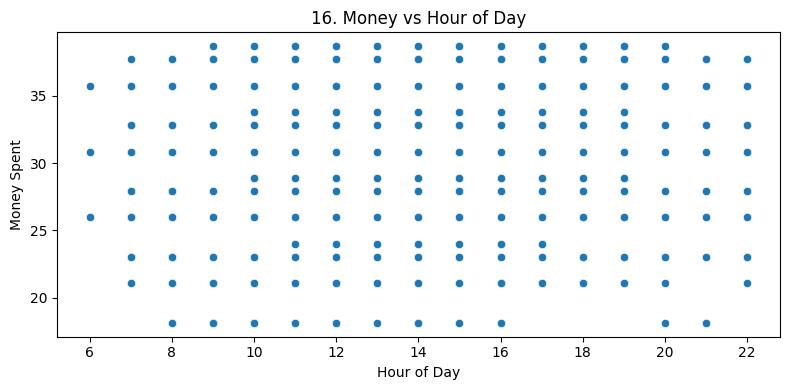

In [30]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=df['hour_of_day'], y=df['money'])
plt.title(f"{plot_no}. Money vs Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Money Spent")
show_fig()
plot_no += 1

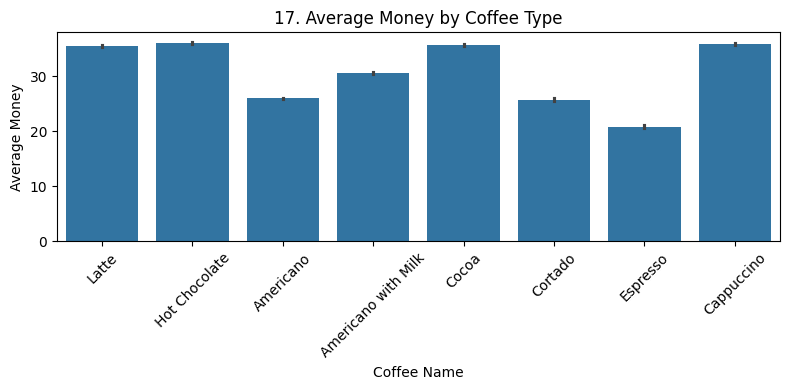

In [31]:
plt.figure(figsize=(8,4))
sns.barplot(x=df['coffee_name'], y=df['money'], estimator='mean')
plt.title(f"{plot_no}. Average Money by Coffee Type")
plt.xlabel("Coffee Name")
plt.ylabel("Average Money")
plt.xticks(rotation=45)
show_fig()
plot_no += 1

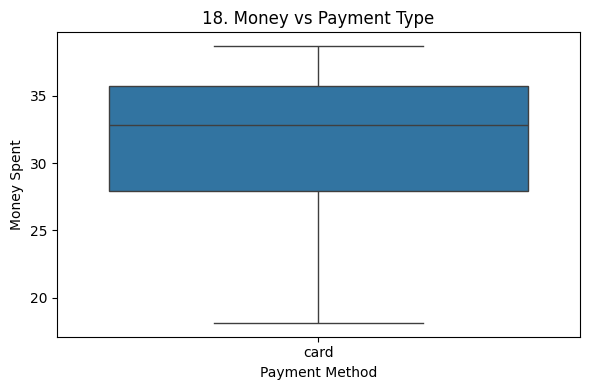

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['cash_type'], y=df['money'])
plt.title(f"{plot_no}. Money vs Payment Type")
plt.xlabel("Payment Method")
plt.ylabel("Money Spent")
show_fig()
plot_no += 1

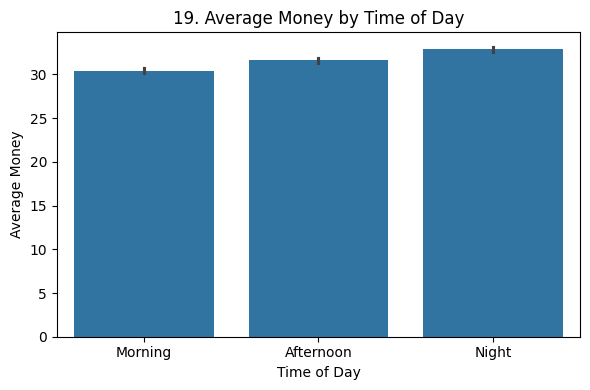

In [33]:
plt.figure(figsize=(6,4))
sns.barplot(x=df['Time_of_Day'], y=df['money'], estimator='mean')
plt.title(f"{plot_no}. Average Money by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Money")
show_fig()
plot_no += 1

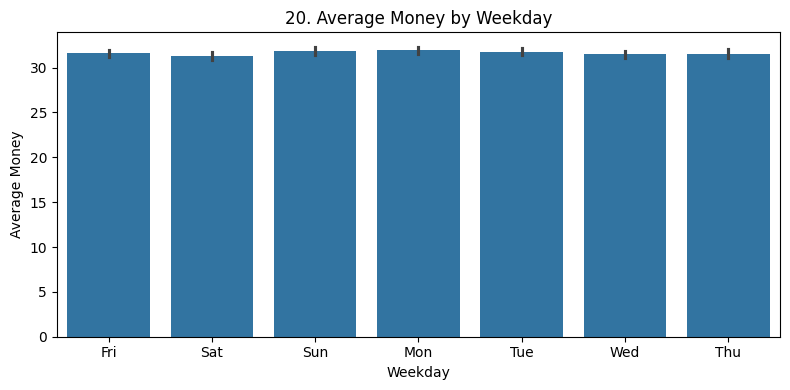

In [34]:
plt.figure(figsize=(8,4))
sns.barplot(x=df['Weekday'], y=df['money'], estimator='mean')
plt.title(f"{plot_no}. Average Money by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Money")
show_fig()
plot_no += 1

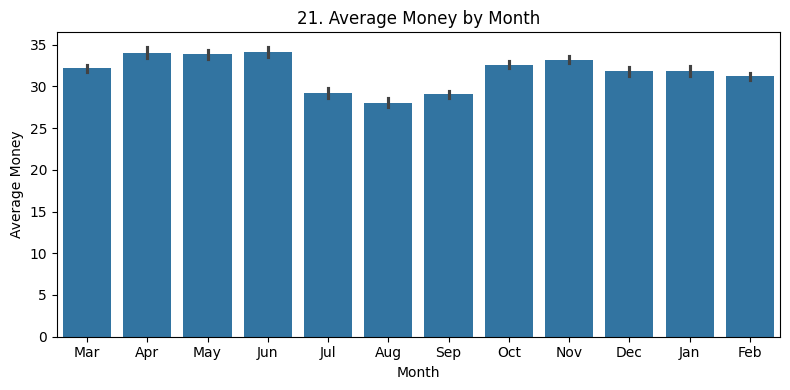

In [35]:
plt.figure(figsize=(8,4))
sns.barplot(x=df['Month_name'], y=df['money'], estimator='mean')
plt.title(f"{plot_no}. Average Money by Month")
plt.xlabel("Month")
plt.ylabel("Average Money")
show_fig()
plot_no += 1

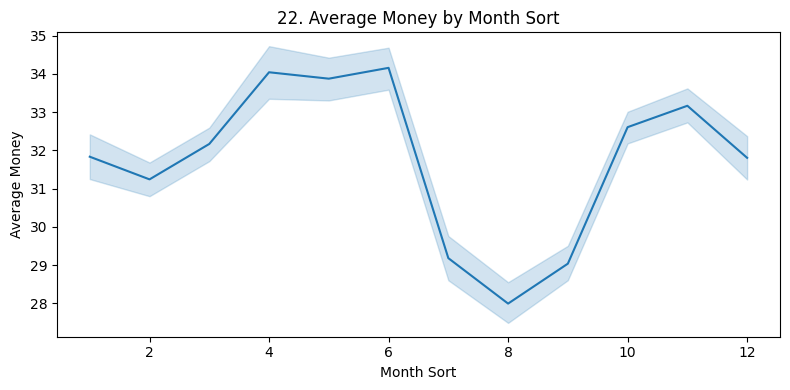

In [36]:
plt.figure(figsize=(8,4))
sns.lineplot(x=df['Monthsort'], y=df['money'], estimator='mean')
plt.title(f"{plot_no}. Average Money by Month Sort")
plt.xlabel("Month Sort")
plt.ylabel("Average Money")
show_fig()
plot_no += 1

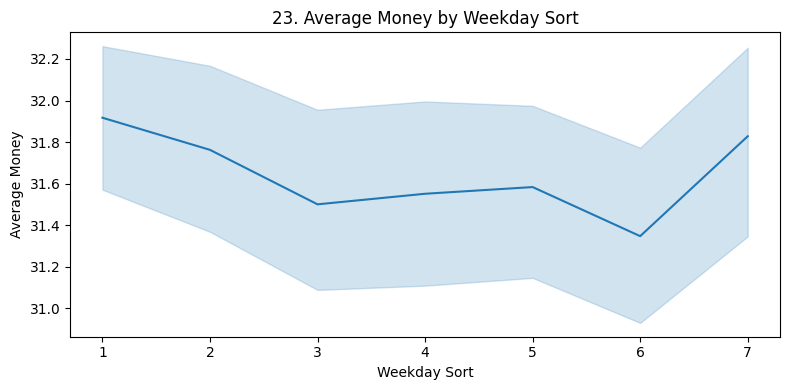

In [37]:
plt.figure(figsize=(8,4))
sns.lineplot(x=df['Weekdaysort'], y=df['money'], estimator='mean')
plt.title(f"{plot_no}. Average Money by Weekday Sort")
plt.xlabel("Weekday Sort")
plt.ylabel("Average Money")
show_fig()
plot_no += 1

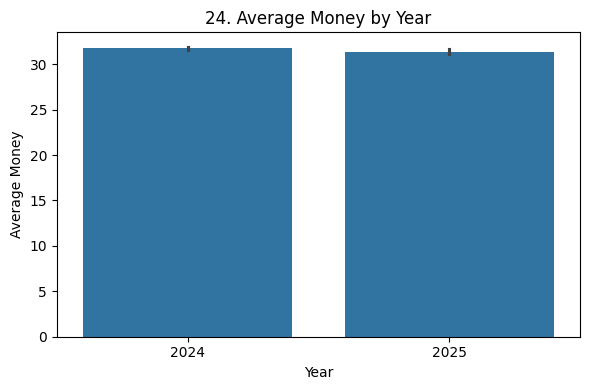

In [38]:
plt.figure(figsize=(6,4))
sns.barplot(x=df['year'], y=df['money'], estimator='mean')
plt.title(f"{plot_no}. Average Money by Year")
plt.xlabel("Year")
plt.ylabel("Average Money")
show_fig()
plot_no += 1

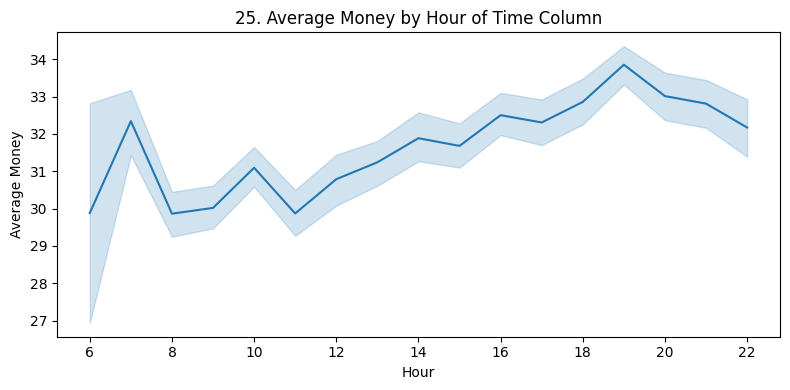

In [39]:
plt.figure(figsize=(8,4))
sns.lineplot(x=df['time_hour'], y=df['money'], estimator='mean')
plt.title(f"{plot_no}. Average Money by Hour of Time Column")
plt.xlabel("Hour")
plt.ylabel("Average Money")
show_fig()
plot_no += 1

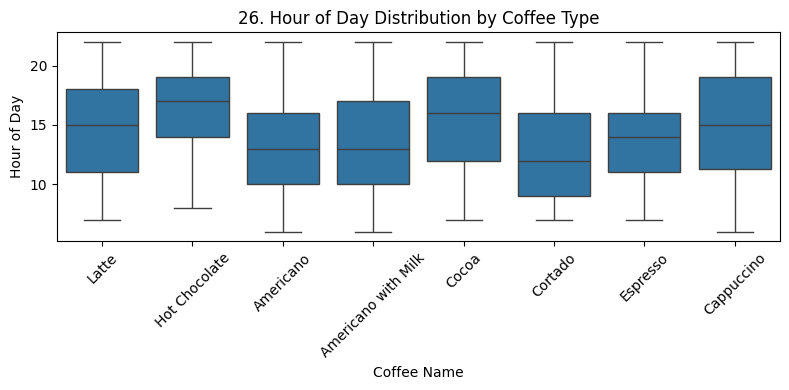

In [40]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['coffee_name'], y=df['hour_of_day'])
plt.title(f"{plot_no}. Hour of Day Distribution by Coffee Type")
plt.xlabel("Coffee Name")
plt.ylabel("Hour of Day")
plt.xticks(rotation=45)
show_fig()
plot_no += 1

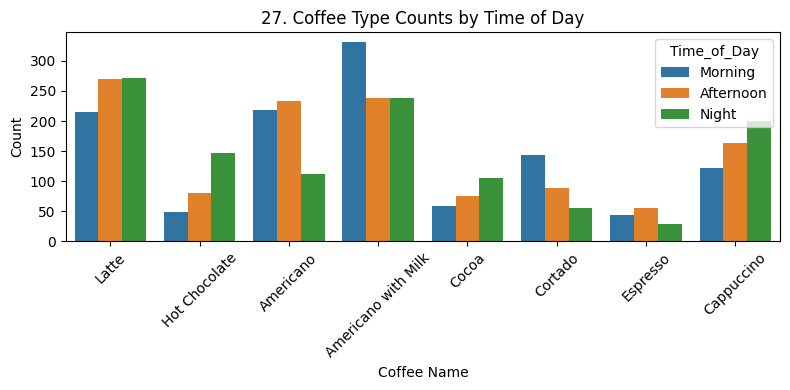

In [41]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['coffee_name'], hue=df['Time_of_Day'])
plt.title(f"{plot_no}. Coffee Type Counts by Time of Day")
plt.xlabel("Coffee Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
show_fig()
plot_no += 1

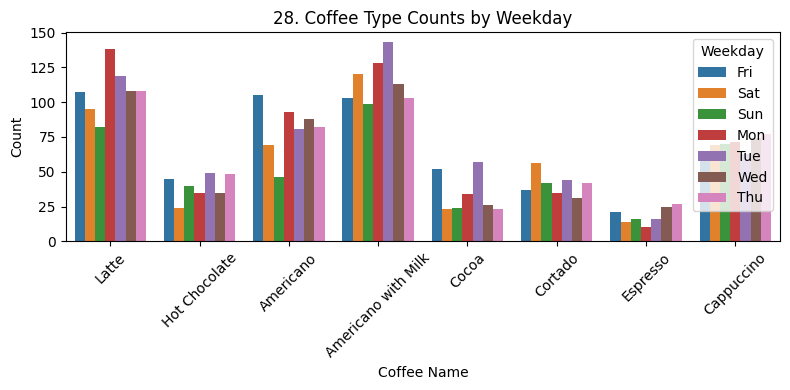

In [42]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['coffee_name'], hue=df['Weekday'])
plt.title(f"{plot_no}. Coffee Type Counts by Weekday")
plt.xlabel("Coffee Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
show_fig()
plot_no += 1

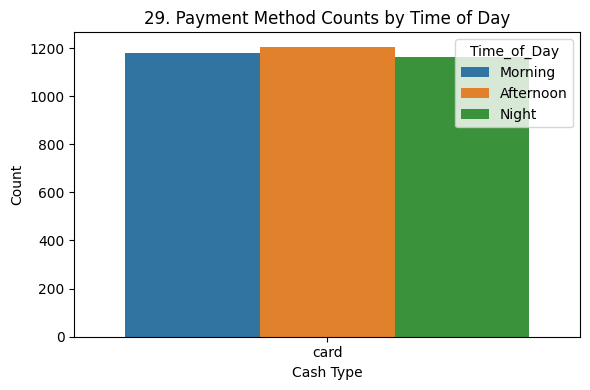

In [43]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['cash_type'], hue=df['Time_of_Day'])
plt.title(f"{plot_no}. Payment Method Counts by Time of Day")
plt.xlabel("Cash Type")
plt.ylabel("Count")
show_fig()
plot_no += 1

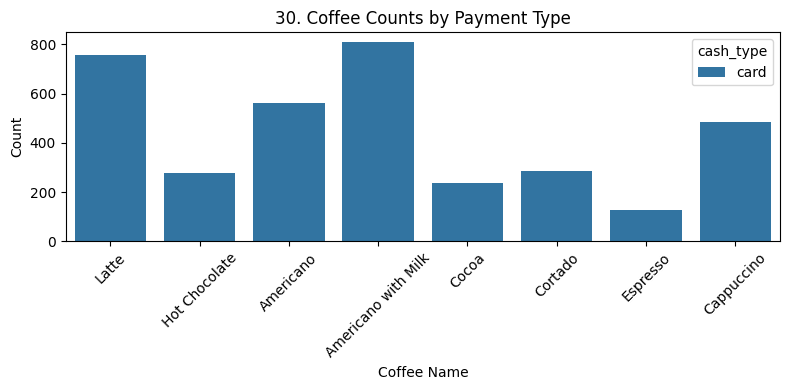

In [44]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['coffee_name'], hue=df['cash_type'])
plt.title(f"{plot_no}. Coffee Counts by Payment Type")
plt.xlabel("Coffee Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
show_fig()
plot_no += 1

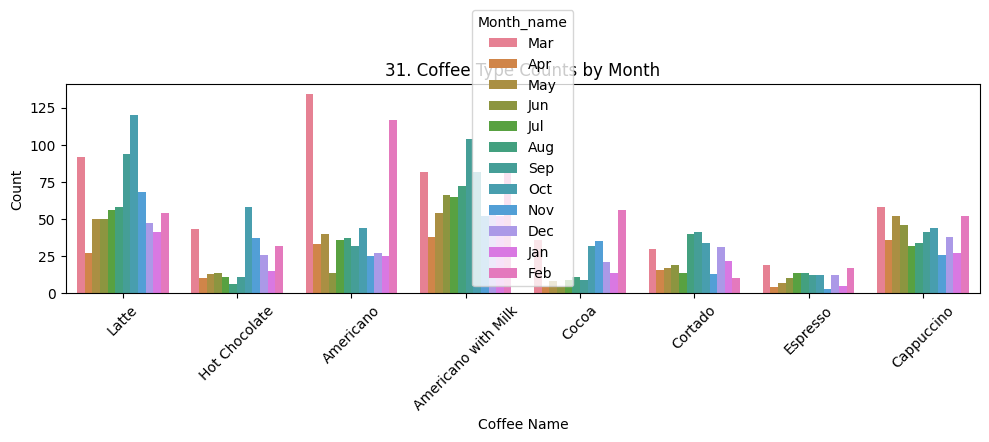

In [45]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['coffee_name'], hue=df['Month_name'])
plt.title(f"{plot_no}. Coffee Type Counts by Month")
plt.xlabel("Coffee Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
show_fig()
plot_no += 1

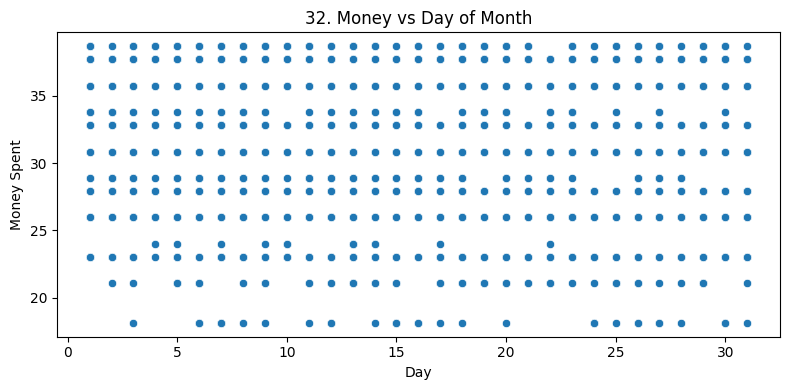

In [46]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=df['day'], y=df['money'])
plt.title(f"{plot_no}. Money vs Day of Month")
plt.xlabel("Day")
plt.ylabel("Money Spent")
show_fig()
plot_no += 1

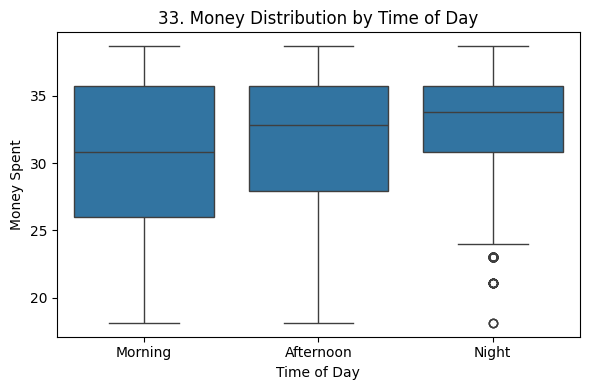

In [47]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Time_of_Day'], y=df['money'])
plt.title(f"{plot_no}. Money Distribution by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Money Spent")
show_fig()
plot_no += 1

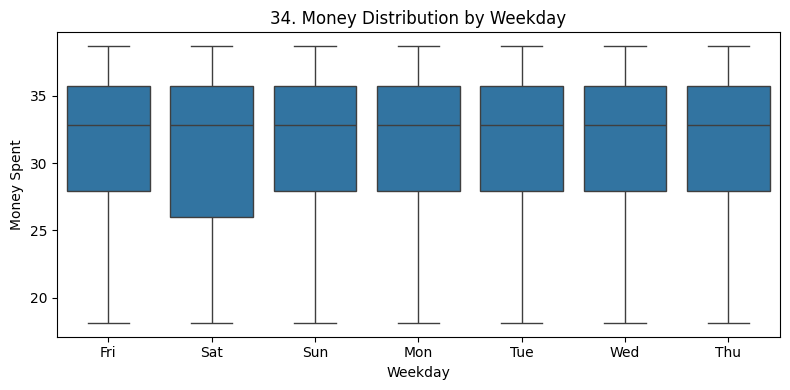

In [48]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Weekday'], y=df['money'])
plt.title(f"{plot_no}. Money Distribution by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Money Spent")
show_fig()
plot_no += 1

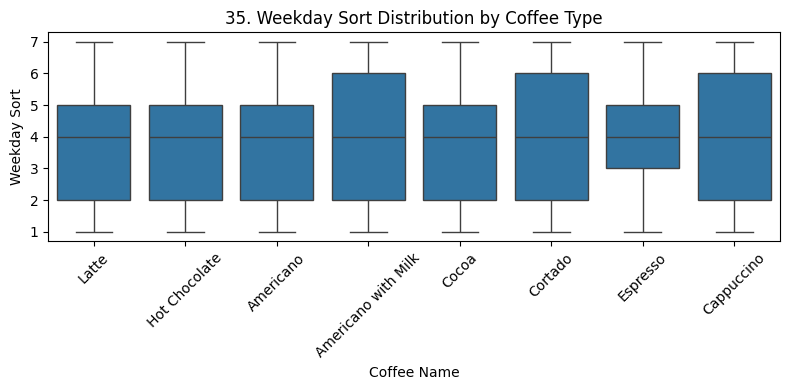

In [49]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['coffee_name'], y=df['Weekdaysort'])
plt.title(f"{plot_no}. Weekday Sort Distribution by Coffee Type")
plt.xlabel("Coffee Name")
plt.ylabel("Weekday Sort")
plt.xticks(rotation=45)
show_fig()
plot_no += 1

## Multivariate

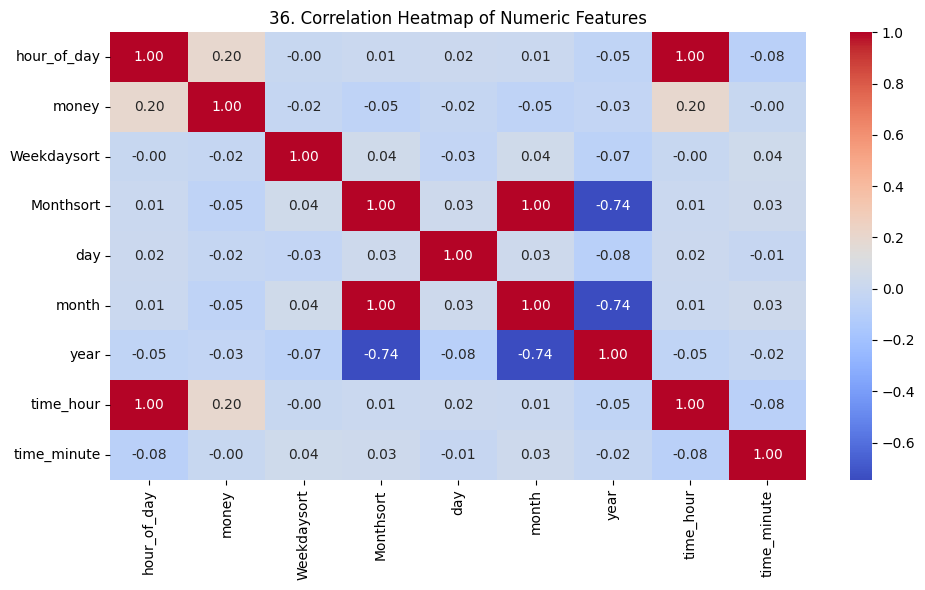

In [50]:
numeric_cols = ['hour_of_day', 'money', 'Weekdaysort', 'Monthsort', 'day', 'month', 'year', 'time_hour', 'time_minute']

plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title(f"{plot_no}. Correlation Heatmap of Numeric Features")
show_fig()
plot_no += 1

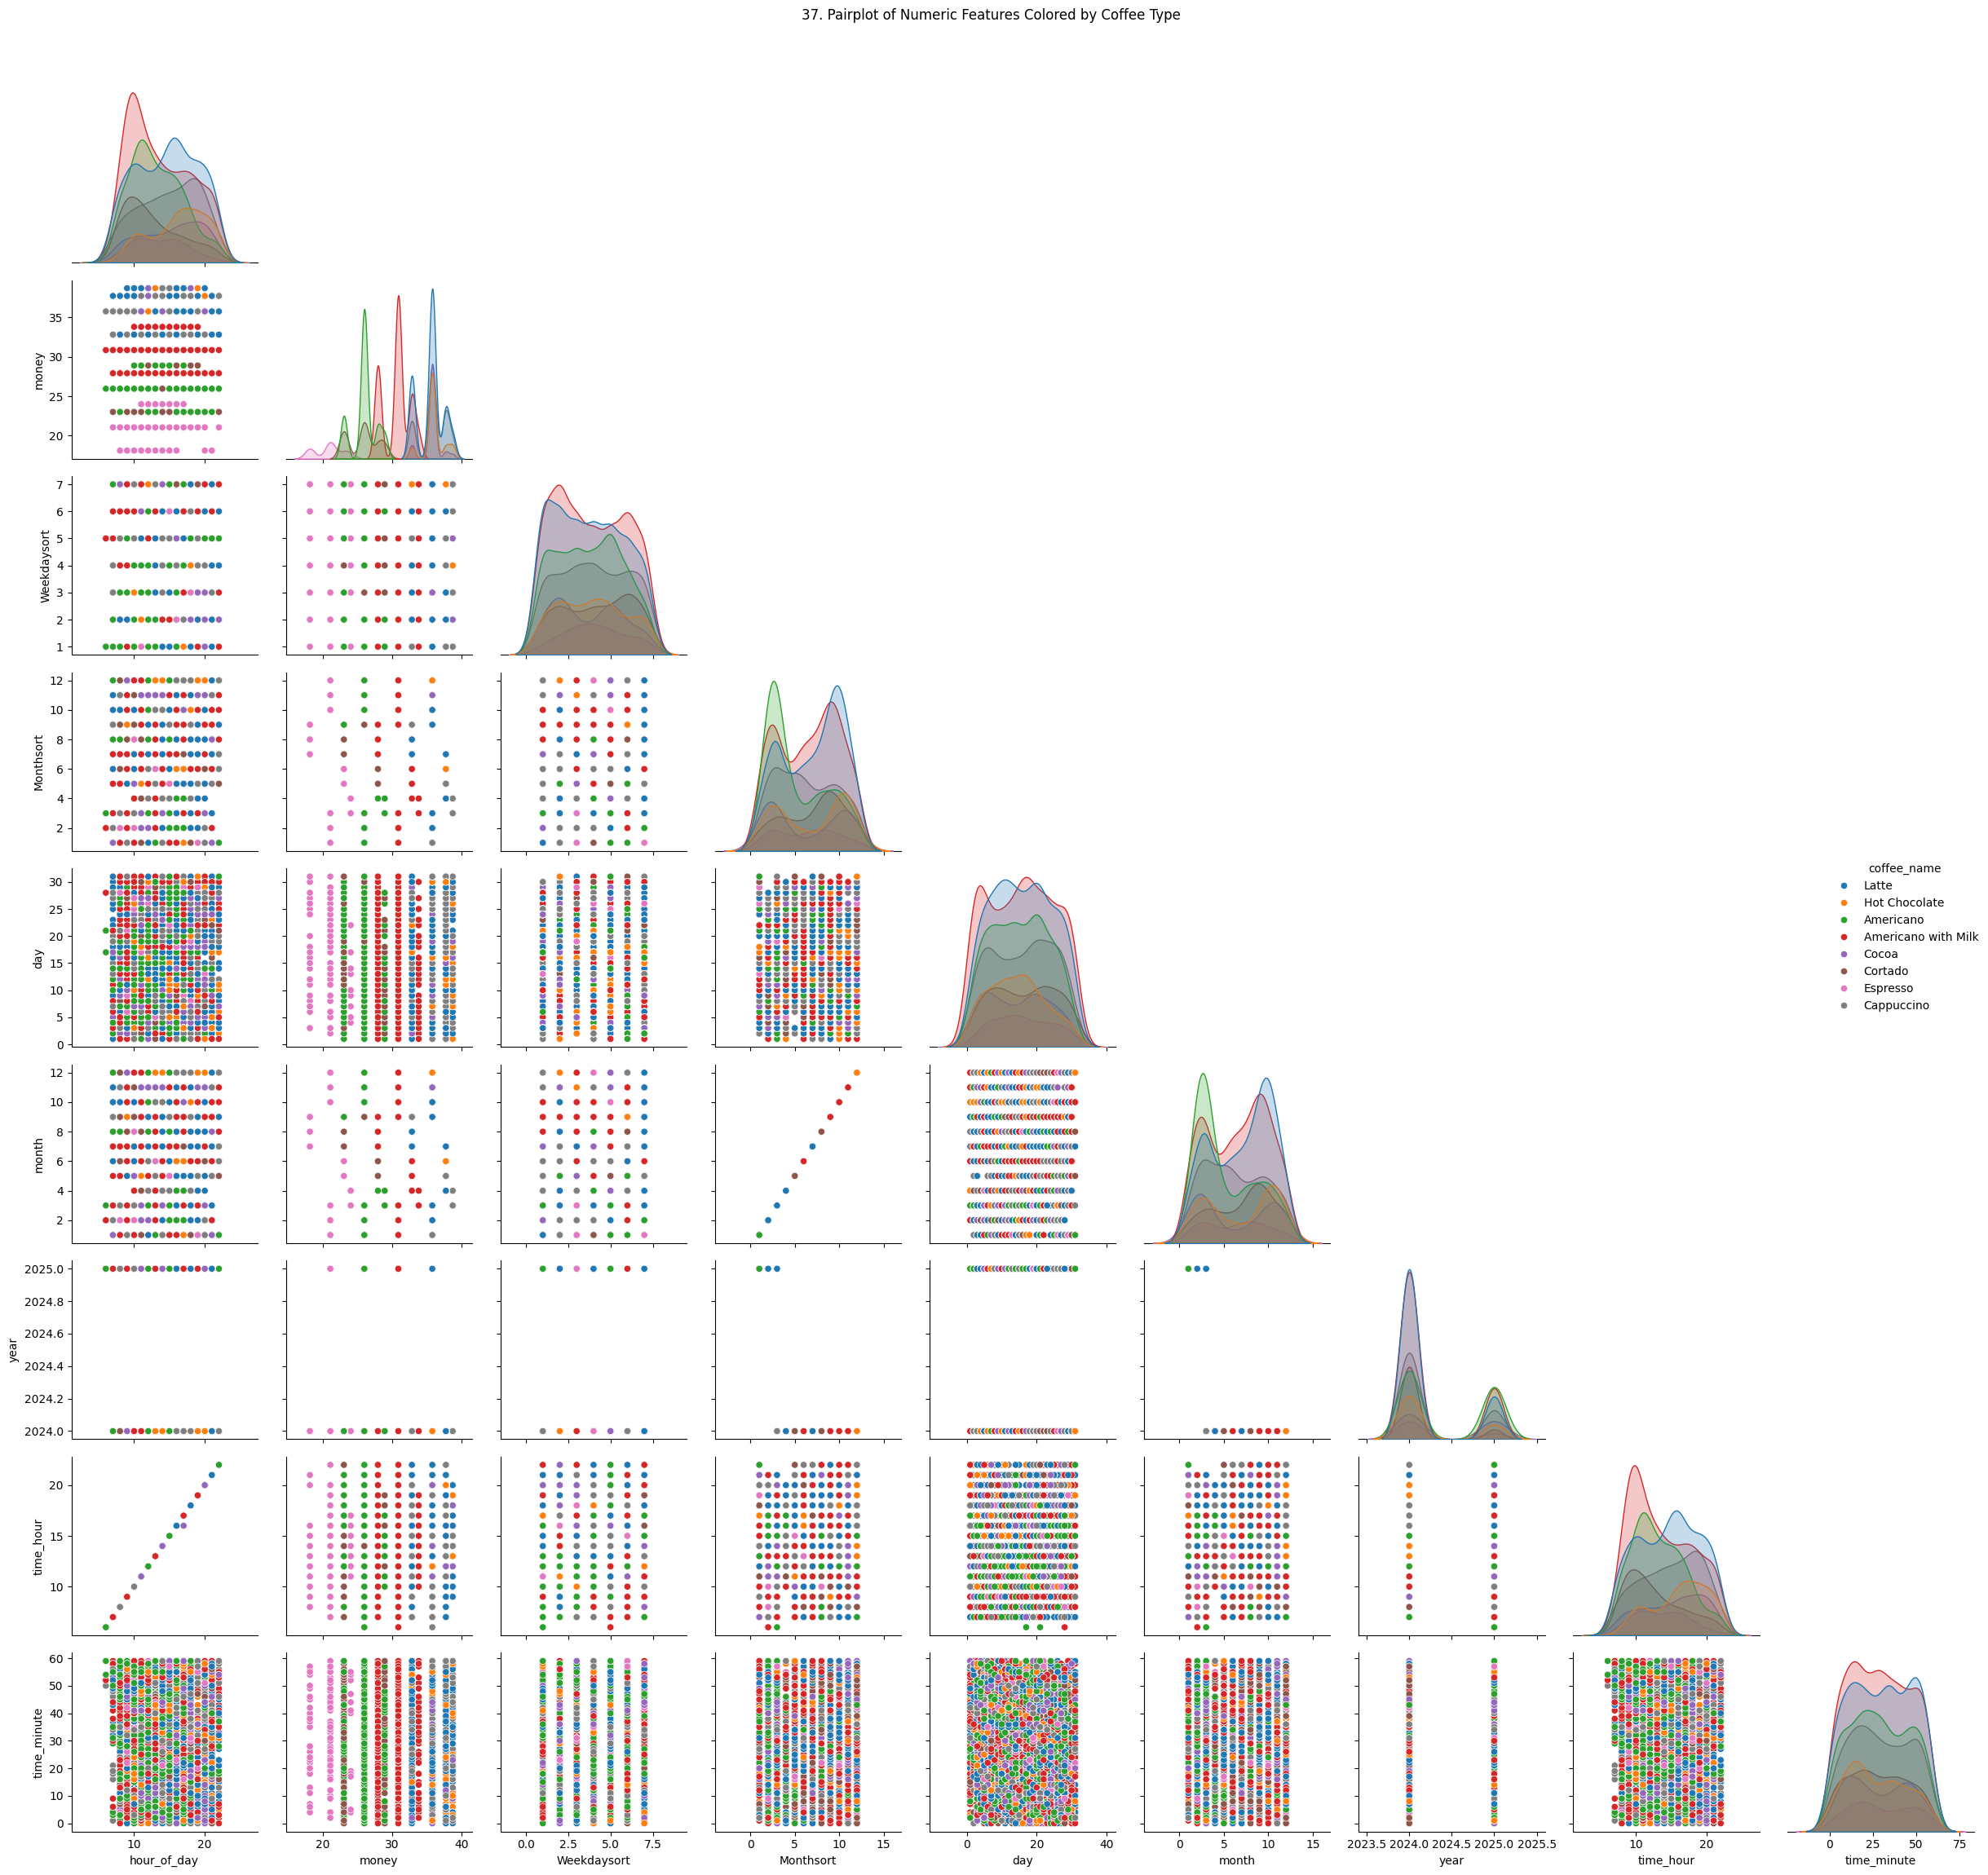

In [51]:
sns.pairplot(df[numeric_cols + ['coffee_name']], hue='coffee_name', diag_kind='kde', corner=True)
plt.suptitle(f"{plot_no}. Pairplot of Numeric Features Colored by Coffee Type", y=1.02)
show_fig()
plot_no += 1

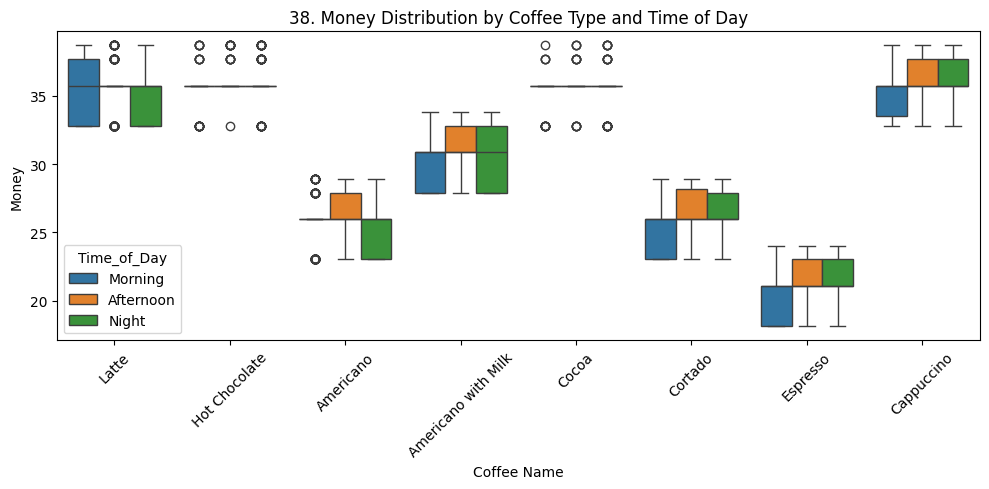

In [52]:
plt.figure(figsize=(10,5))
sns.boxplot(x='coffee_name', y='money', hue='Time_of_Day', data=df)
plt.title(f"{plot_no}. Money Distribution by Coffee Type and Time of Day")
plt.xlabel("Coffee Name")
plt.ylabel("Money")
plt.xticks(rotation=45)
show_fig()
plot_no += 1

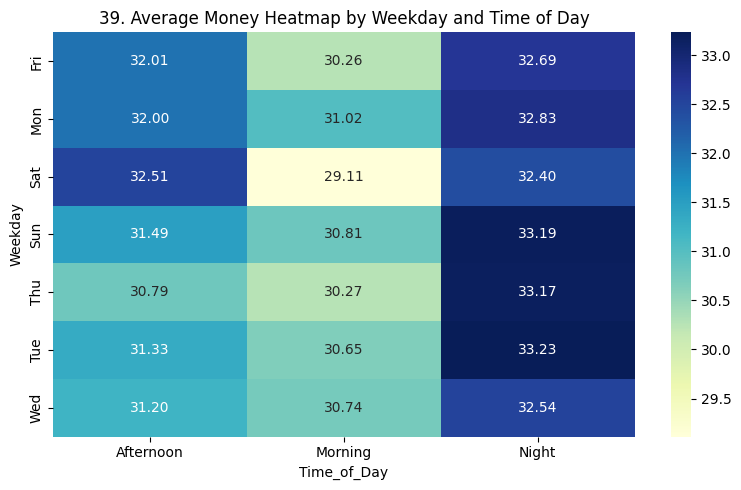

In [53]:
pivot = df.pivot_table(values='money', index='Weekday', columns='Time_of_Day', aggfunc='mean')

plt.figure(figsize=(8,5))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title(f"{plot_no}. Average Money Heatmap by Weekday and Time of Day")
show_fig()
plot_no += 1

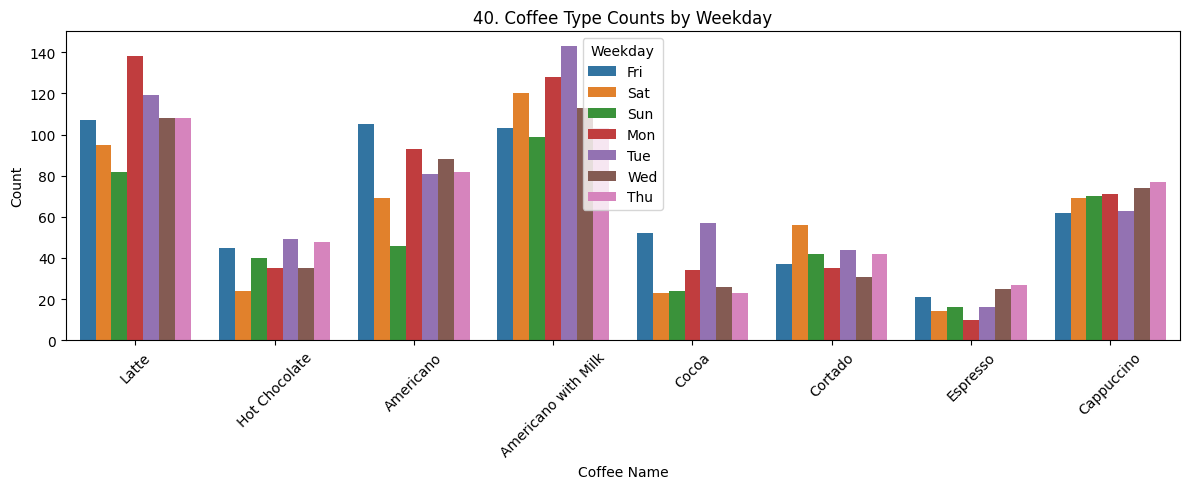

In [54]:
plt.figure(figsize=(12,5))
sns.countplot(x='coffee_name', hue='Weekday', data=df)
plt.title(f"{plot_no}. Coffee Type Counts by Weekday")
plt.xlabel("Coffee Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
show_fig()
plot_no += 1

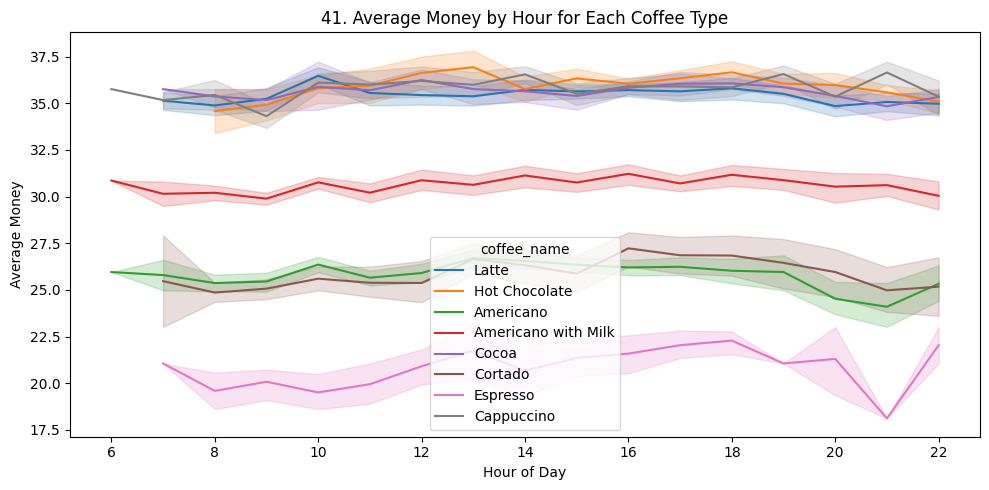

In [55]:
plt.figure(figsize=(10,5))
sns.lineplot(x='time_hour', y='money', hue='coffee_name', data=df, estimator='mean')
plt.title(f"{plot_no}. Average Money by Hour for Each Coffee Type")
plt.xlabel("Hour of Day")
plt.ylabel("Average Money")
show_fig()
plot_no += 1

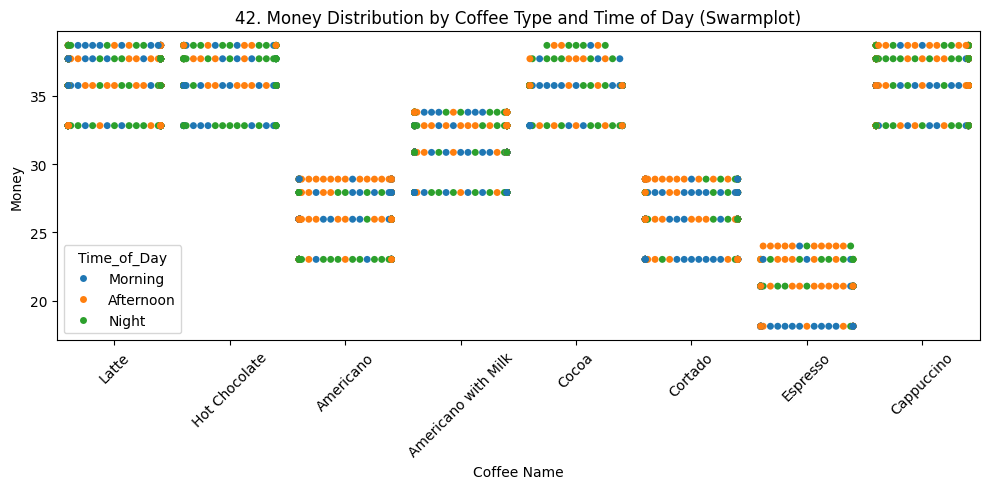

In [56]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='coffee_name', y='money', hue='Time_of_Day', data=df)
plt.title(f"{plot_no}. Money Distribution by Coffee Type and Time of Day (Swarmplot)")
plt.xlabel("Coffee Name")
plt.ylabel("Money")
plt.xticks(rotation=45)
show_fig()
plot_no += 1


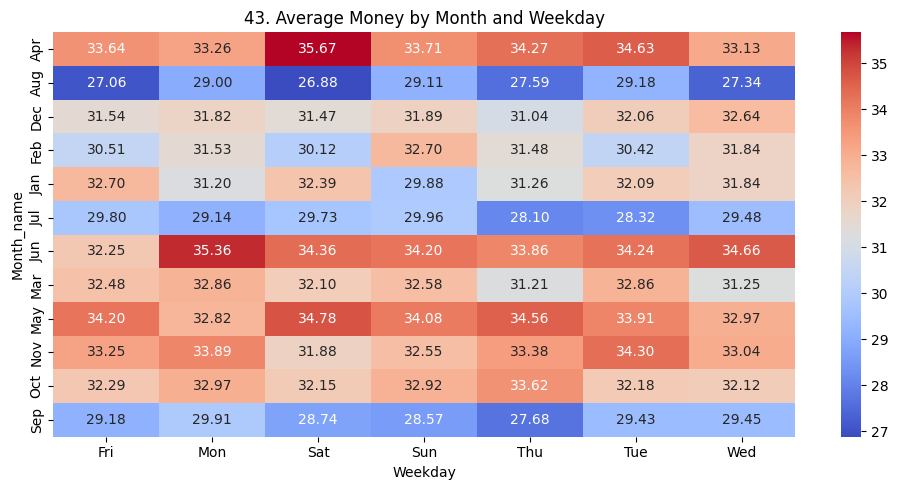

In [57]:
pivot = df.pivot_table(values='money', index='Month_name', columns='Weekday', aggfunc='mean')
plt.figure(figsize=(10,5))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title(f"{plot_no}. Average Money by Month and Weekday")
show_fig()
plot_no += 1

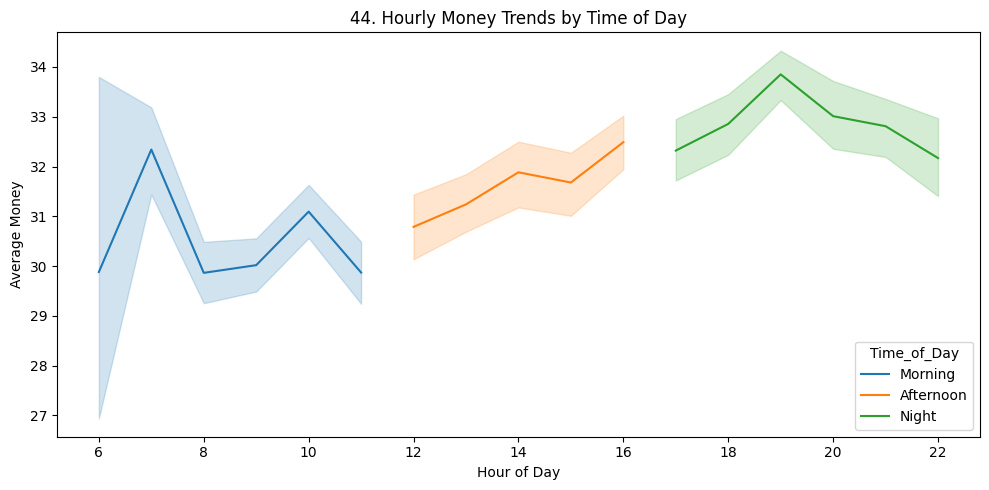

In [58]:
plt.figure(figsize=(10,5))
sns.lineplot(x='hour_of_day', y='money', hue='Time_of_Day', data=df, estimator='mean')
plt.title(f"{plot_no}. Hourly Money Trends by Time of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Money")
show_fig()
plot_no += 1

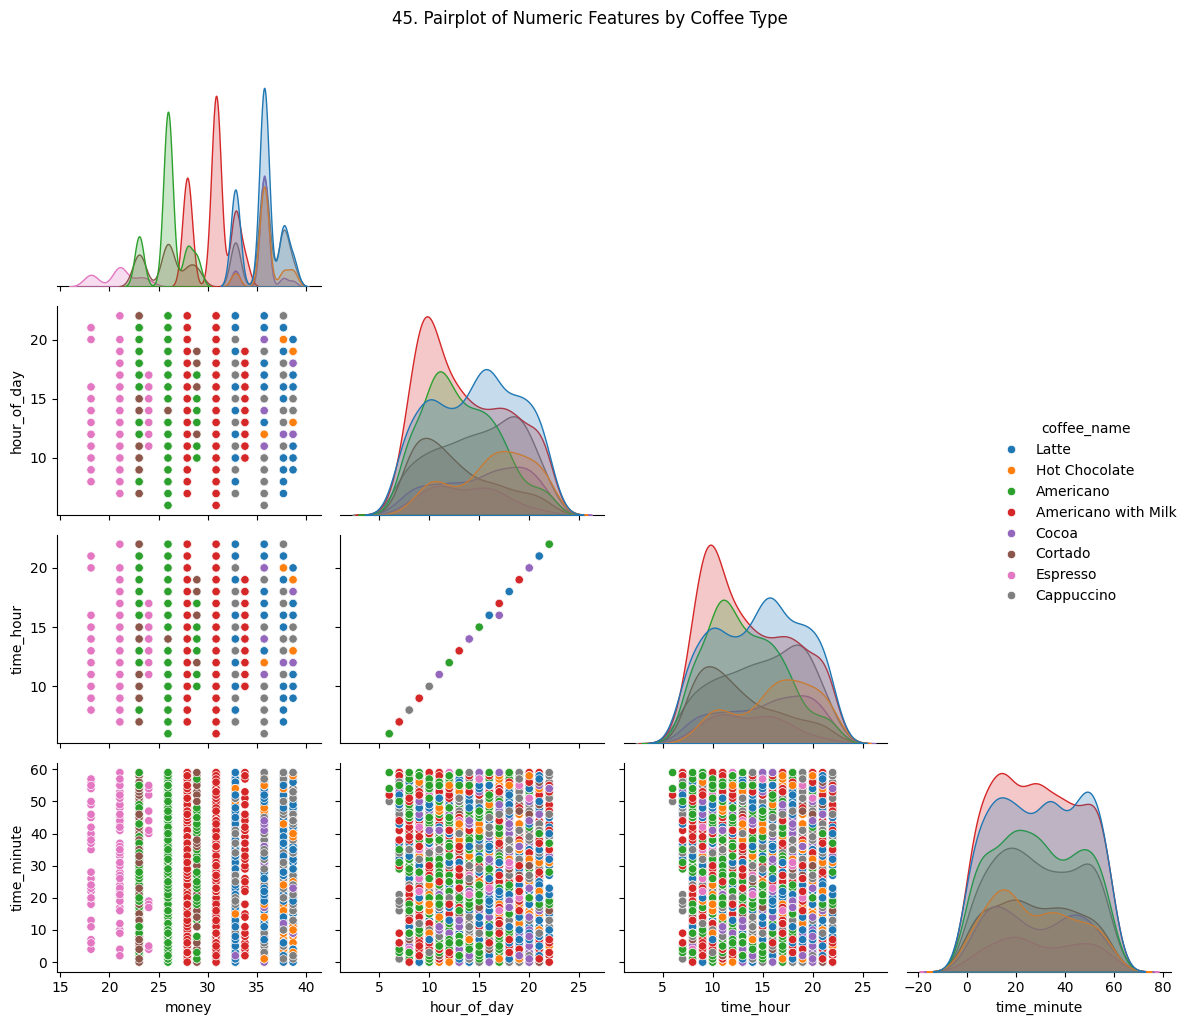

In [59]:
sns.pairplot(df[['money','hour_of_day','time_hour','time_minute','coffee_name','Time_of_Day']], 
             hue='coffee_name', diag_kind='kde', corner=True)
plt.suptitle(f"{plot_no}. Pairplot of Numeric Features by Coffee Type", y=1.02)
show_fig()
plot_no += 1

# Prediction

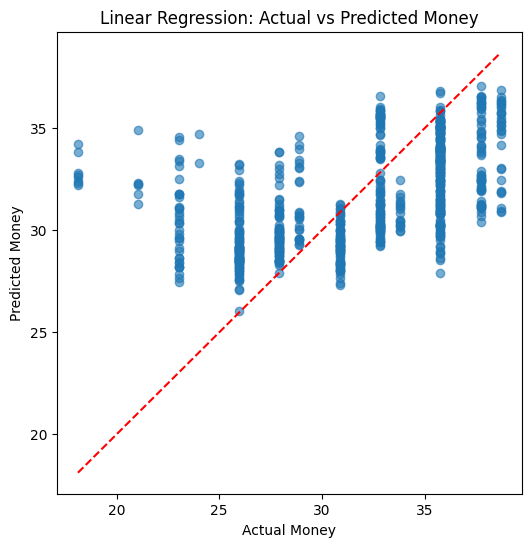

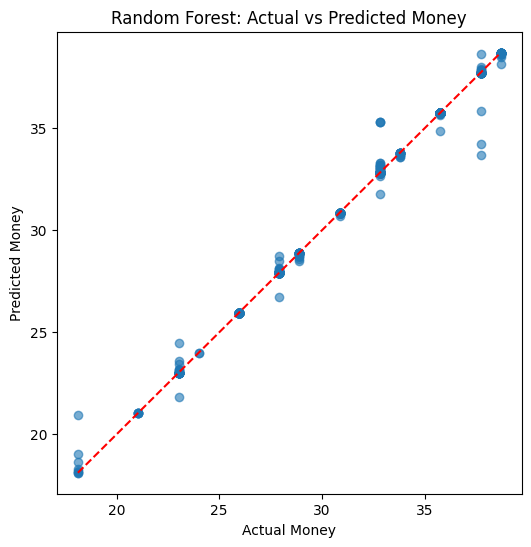

In [60]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Columns to encode
cat_cols = ['cash_type', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name']

le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # save encoder if needed later

# Define Features and Target
# Features (exclude 'money' and 'Time')
X = df.drop(columns=['money', 'Time'])  # Date is already dropped
y = df['money']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results[name] = {'R2 Score': r2, 'MAE': mae, 'RMSE': rmse}
    
    # Plot actual vs predicted
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Money")
    plt.ylabel("Predicted Money")
    plt.title(f"{name}: Actual vs Predicted Money")
    plt.show()

### Show Result Table

In [61]:
accuracy_df = pd.DataFrame(results).T
print(accuracy_df)

                   R2 Score       MAE      RMSE
Linear Regression  0.280765  3.202361  4.056317
Random Forest      0.995573  0.059338  0.318241


### 